# Code to be added to utils

## plotting utils

In [2]:
def tiss_cell_fractions(adata,
                        technology_col='method', # this makes separate plots
                        breakby='tissue', # this makes separate plots
                        category='cell_ontology_class',
                        dataset="Pilot2",
                        groupby = "donor"):
    
    
    import sys
    sys.path.append('/home/angela/sapiens/tabula-sapiens/')
    from utils.colorDict import donor_colors
    donors_color_dict = donor_colors()
    
    for m in set(adata.obs[technology_col]):
        adata_subset = adata[adata.obs[technology_col] == m].copy()
        adata_subset = remove_cats(adata_subset)
        for t in set(adata_subset.obs[breakby]):
            print(t)
            tiss = adata_subset[adata_subset.obs[breakby] == t].copy()
            tiss = remove_cats(tiss)

#             aux = tiss.obs.groupby([category,groupby]).count()
#             aux = pd.DataFrame(aux).reset_index()
#             aux['fraction'] = aux[aux.columns[1]]/aux[aux.columns[1]].sum()
#             aux['cell_number'] = aux[aux.columns[1]]
            aux = tiss.obs.groupby([category,groupby])['cell_id'].count()
            aux = pd.DataFrame(aux).reset_index()
            aux['fraction'] = aux['cell_id']/aux['cell_id'].sum()
            aux['cell_number'] = aux['cell_id']

#             aux[[category,'fraction','cell_number']].to_csv("./cell_fractions/"+dataset+"_"+m+"_"+t+'.csv')

            f, ax = plt.subplots(figsize=(15,10)) 
            g = sns.barplot(data = aux, y = 'fraction',x = category, 
                            hue = groupby,palette=donors_color_dict,
                            ax = ax)
            ax.set_xticklabels(ax.get_xticklabels(),rotation=90);
            ax.set(xlabel= dataset +" "+ t +' cell types', ylabel='Relative abundance in'+ m +' data');
            plt.tight_layout()
#             plt.savefig("./cell_fractions/"+dataset+"_"+m+"_"+t+'.pdf')

In [3]:
pwd

'/data/angela/sapiens/tabula-sapiens/analysis-scripts/publication/v0'

# Setup

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [5]:
import sys
sys.path.append('/data/angela/src/scVI_TSP/')
sys.path.append('/data/angela/sapiens/tabula-sapiens/')
# from utils.annotations_utils import *
from utils.colorDict import *
from utils.general_utils import *
from utils.plotting_utils import *

# Load color dicts

In [6]:
donors_color_dict = donor_colors()
tissues_color_dict = tissue_colors()
methods_color_dict = method_colors()
compartments_color_dict = compartment_colors()

# Read data

In [9]:
data_path = "/mnt/ibm_lg/angela/sapiens/data/sapiens_paper1/"

In [10]:
adata = pd.read_csv(
    "/mnt/ibm_lg/angela/sapiens/data/TSP1_TSP15/TSP1_TSP15_metadata_clean.csv",
    low_memory=False
)
# adata = remove_cats(adata)
adata

,cell_id,donor,tissue,anatomical_position,method,cell_ontology_class,free_annotation,consensus_prediction,consensus_percentage,manually_annotated,...,10X_barcode,cDNAplate,libraryplate,well,notes,seqrun,cell_identifier,n_counts,n_genes,compartment
0,AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,TSP6,Liver,NaN,10X,macrophage,Monocyte/Macrophage,macrophage,42.86,True,...,AAACCCACACTCCTGT,NaN,NaN,NaN,NaN,5,AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,7633.0,2259,immune
1,AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,TSP6,Liver,NaN,10X,monocyte,Monocyte,monocyte,42.86,True,...,AAACGAAGTACCAGAG,NaN,NaN,NaN,NaN,5,AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,2858.0,1152,immune
2,AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,TSP6,Liver,NaN,10X,endothelial cell of hepatic sinusoid,Endothelial,endothelial cell,28.57,True,...,AAACGCTCAACGGCTC,NaN,NaN,NaN,NaN,5,AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,7787.0,2983,endothelial
3,AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,TSP6,Liver,NaN,10X,macrophage,Monocyte/Macrophage,macrophage,85.71,True,...,AAAGAACAGCCTCTTC,NaN,NaN,NaN,NaN,5,AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,10395.0,2598,immune
4,AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,TSP6,Liver,NaN,10X,liver dendritic cell,Dendritic cell,dendritic cell,57.14,True,...,AAAGAACGTAGCACAG,NaN,NaN,NaN,NaN,5,AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,6610.0,2125,immune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481115,TSP2_Vasculature_aorta_SS2_B114577_B133059_End...,TSP2,Vasculature,aorta,smartseq2,endothelial cell,endothelial cell,endothelial cell,1.00,True,...,NaN,NaN,NaN,NaN,NaN,2,TSP2_Vasculature_aorta_SS2_B114577_B133059_End...,13205.0,579,endothelial
481116,TSP2_Vasculature_aorta_SS2_B114577_B133059_End...,TSP2,Vasculature,aorta,smartseq2,endothelial cell,endothelial cell,endothelial cell,0.86,True,...,NaN,NaN,NaN,NaN,NaN,2,TSP2_Vasculature_aorta_SS2_B114577_B133059_End...,9565.0,529,endothelial
481117,TSP2_Vasculature_aorta_SS2_B114577_B133059_End...,TSP2,Vasculature,aorta,smartseq2,endothelial cell,endothelial cell,endothelial cell,1.00,True,...,NaN,NaN,NaN,NaN,NaN,2,TSP2_Vasculature_aorta_SS2_B114577_B133059_End...,195639.0,2753,endothelial
481118,TSP2_Vasculature_aorta_SS2_B114577_B133059_End...,TSP2,Vasculature,aorta,smartseq2,endothelial cell,endothelial cell,endothelial cell,1.00,True,...,NaN,NaN,NaN,NaN,NaN,2,TSP2_Vasculature_aorta_SS2_B114577_B133059_End...,37260.0,984,endothelial


# Generate figures

## Sequencing data

In [11]:
# metadata = adata.obs.copy()
metadata = adata.copy()

metadata.head()

,cell_id,donor,tissue,anatomical_position,method,cell_ontology_class,free_annotation,consensus_prediction,consensus_percentage,manually_annotated,...,10X_barcode,cDNAplate,libraryplate,well,notes,seqrun,cell_identifier,n_counts,n_genes,compartment
0,AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,TSP6,Liver,NaN,10X,macrophage,Monocyte/Macrophage,macrophage,42.86,True,...,AAACCCACACTCCTGT,NaN,NaN,NaN,NaN,5,AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,7633.0,2259,immune
1,AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,TSP6,Liver,NaN,10X,monocyte,Monocyte,monocyte,42.86,True,...,AAACGAAGTACCAGAG,NaN,NaN,NaN,NaN,5,AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,2858.0,1152,immune
2,AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,TSP6,Liver,NaN,10X,endothelial cell of hepatic sinusoid,Endothelial,endothelial cell,28.57,True,...,AAACGCTCAACGGCTC,NaN,NaN,NaN,NaN,5,AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,7787.0,2983,endothelial
3,AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,TSP6,Liver,NaN,10X,macrophage,Monocyte/Macrophage,macrophage,85.71,True,...,AAAGAACAGCCTCTTC,NaN,NaN,NaN,NaN,5,AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,10395.0,2598,immune
4,AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,TSP6,Liver,NaN,10X,liver dendritic cell,Dendritic cell,dendritic cell,57.14,True,...,AAAGAACGTAGCACAG,NaN,NaN,NaN,NaN,5,AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,6610.0,2125,immune


In [12]:
# df = pd.DataFrame(metadata.groupby(['donor','tissue','compartment','cell_ontology_type'])['cell_id'].count())
df = metadata[metadata['method']=='10X'].copy()
df["cell_id"] = df.index.copy()
# df["tissue"] = df["Organ"].copy()
df = pd.DataFrame(df.groupby(['tissue','compartment','donor'])['cell_id'].count())
df = df.reset_index()
df = pd.pivot_table(data = df,values='cell_id', index=['tissue','donor'],columns=['compartment'])
df = df.replace({np.nan:0})
df['sum'] = df.sum(axis=1)
df.iloc[:, :] = df.iloc[:, :].div(df['sum'],axis=0)*100
df = df.drop('sum',axis=1)
df

compartment            endothelial  epithelial  germ line      immune  \
tissue          donor                                                   
Bladder         TSP1      1.760116   16.185810   0.000000   40.074397   
                TSP2      1.328477    9.235055   0.000000   59.031498   
Blood           TSP1      0.000000    0.000000   0.000000  100.000000   
                TSP10     0.000000    0.000000   0.000000  100.000000   
                TSP14     0.000000    0.000000   0.000000  100.000000   
                TSP2      0.000000    0.000000   0.000000  100.000000   
                TSP7      0.000000    0.000000   0.000000  100.000000   
                TSP8      0.000000    0.000000   0.000000  100.000000   
Bone_Marrow     TSP11     0.000000    0.000000   0.000000  100.000000   
                TSP14     0.000000    0.000000   0.000000  100.000000   
                TSP2      0.000000    0.000000   0.000000  100.000000   
Eye             TSP15     9.623953   66.583497   0.000000    7.859562   
                TSP3      0.046232   99.815072   0.000000    0.092464   
                TSP5      1.016673   79.056527   0.000000   12.240748   
Fat             TSP10    14.980740    0.000000   0.000000   29.098978   
                TSP14    24.458931    0.000000   0.000000   40.299870   
Heart           TSP12    22.773424    9.262558   0.000000    0.427503   
Kidney          TSP2      1.024701   87.994823   0.000000   10.980477   
Large_Intestine TSP14     0.271003   36.515430   0.000000   55.765364   
                TSP2      1.222902   89.772096   0.000000    3.835464   
Liver           TSP14    16.162087   70.889613   0.000000   12.668840   
                TSP6     12.466944    2.531167   0.000000   82.508500   
Lung            TSP1      2.893916   14.781357   0.000000   80.669918   
                TSP14     1.080460   89.011494   0.000000    8.758621   
                TSP2     12.574711   44.774560   0.000000   40.068473   
Lymph_Node      TSP14     0.450258    0.000000   0.000000   99.201367   
                TSP2      0.105325    0.000000   0.000000   99.894675   
                TSP7      0.033560    0.000000   0.000000   99.924490   
Mammary         TSP4      4.094488   52.153775   0.000000   23.983326   
Muscle          TSP1     29.020701    0.000000   0.000000    5.254777   
                TSP14     7.684060    0.000000   0.000000    8.291637   
                TSP2     22.220720    0.000000   0.000000    8.197608   
Pancreas        TSP1      4.044180   93.916737   0.000000    1.478335   
                TSP9     27.735792   29.262394   0.000000   36.955865   
Prostate        TSP14     3.473492   64.929921   0.335161   30.773918   
                TSP8      3.870173   77.781430   0.000000   14.305670   
Salivary_Gland  TSP14     2.803738   62.678752   0.000000   26.145704   
                TSP7      1.685067   22.742592   0.000000   63.625799   
Skin            TSP10    13.986850    1.175533   0.000000   52.261407   
                TSP14    13.367032    0.140410   0.000000   38.528503   
Small_Intestine TSP14     0.143431   18.483458   0.000000   80.531650   
                TSP2      2.209551   84.034212   0.000000   12.045617   
Spleen          TSP14     0.674963    0.000000   0.000000   99.325037   
                TSP2      2.329053    0.000000   0.000000   97.670947   
                TSP7      4.633516    0.000000   0.000000   95.366484   
Thymus          TSP14    11.289276    0.648809   0.000000   66.326814   
                TSP2     13.954906    0.295987   0.000000   75.406982   
Tongue          TSP14     5.335056   81.410375   0.000000    9.119439   
                TSP7      1.339503   83.170969   0.000000   13.638578   
Trachea         TSP2      0.770128   92.998833   0.000000    0.420070   
                TSP6      4.031073   17.069074   0.000000   53.327735   
Uterus          TSP4     31.324949    3.495174   0.000000   13.381106   
Vasculature     TSP14    14.614745    0.000000   0.000000 

In [13]:
# # df = pd.DataFrame(metadata.groupby(['donor','tissue','compartment','cell_ontology_type'])['cell_id'].count())
# df = metadata[metadata['method']=='10X'].copy()
# df = pd.DataFrame(df.groupby(['tissue','compartment'])['cell_id'].count())
# df = df.reset_index()
# df = pd.pivot_table(data = df,values='cell_id', index=['tissue'],columns=['compartment'])
# df = df.replace({np.nan:0})
# df['sum'] = df.sum(axis=1)
# df.iloc[:, :] = df.iloc[:, :].div(df['sum'],axis=0)*100
# df = df.drop('sum',axis=1)
# df

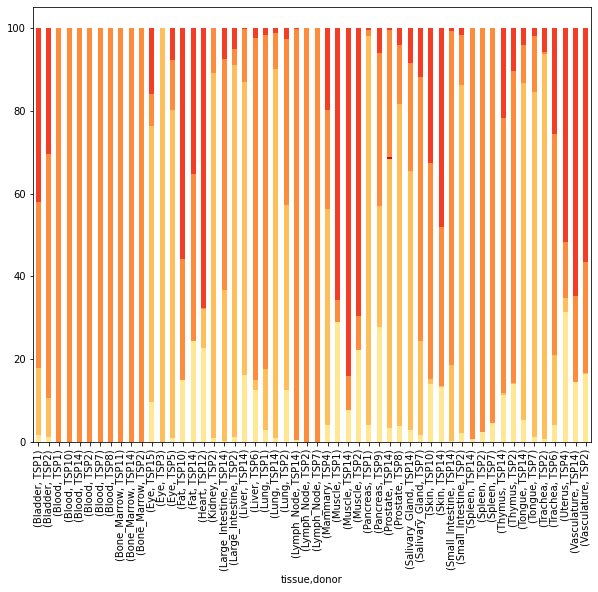

In [15]:
f = plt.figure(figsize=(10,8))
df.plot(
    kind='bar',stacked=True, ax=f.gca(),color=compartments_color_dict,legend=False
)
plt.savefig("figures/compartment_proportions_sequencing.pdf")

In [16]:
compartments_color_dict

{'endothelial': '#ffe793',
 'epithelial': '#febf5a',
 'immune': '#fd8c3c',
 'stromal': '#f43d25',
 'germ line': '#c90823',
 'PNS': '#800026'}

## Read Serena's table

### TSP1+TSP2

In [17]:
pathology = pd.read_excel("Tabula Sapiens Tissue Abundance Ratios.xlsx",index_col=0)
pathology

,Epithelilal,Endothelial,Stromal,Immune,Neuroglia,Spatial Heterogeneity (AKA Error)
Lymph Node,0,15,7,78,0,1
Spleen,0,27,16,57,0,1
Muscle,0,32,65,3,0,1
Diaphragm,0,48,48,4,0,1
Aorta,0,13,81,6,0,1
Duodenum,35,5,24,35,1,2
Ileum,15,2,22,60,1,2
Colon (Proximal),40,5,29,25,1,2
Colon (Distal),35,5,34,25,1,2
Bladder,40,30,10,20,0,2


In [18]:
pathology.columns

Index(['Epithelilal', 'Endothelial', 'Stromal', 'Immune', 'Neuroglia',
       'Spatial Heterogeneity (AKA Error)'],
      dtype='object')

In [18]:
pathology_pancreas = pd.read_csv("serena_tsp1_tsp2_count_per_cell_type.csv",index_col=0)
pathology_pancreas = pathology_pancreas.iloc[-4:]
pathology_pancreas

,endothelial_cell_count,epithelial_cell_count,immune_cell_count,stromal_cell_count,endothelial_pixel_count,epithelial_pixel_count,immune_pixel_count,stromal_pixel_count
image_id,,,,,,,,
PN 20x 1_pilot1_pancreas_labels.png,10,2378,15,325,222,117701,809,14203
PN 20x 3_pilot1_pancreas_labels.png,46,1830,8,91,1117,83315,253,2473
PN 40x 5_pilot1_pancreas_labels.png,58,93,19,116,5085,11865,1600,10279
PN 40x 6_pilot1_pancreas_labels.png,29,61,0,306,2280,7373,0,35055


In [19]:
pathology_pancreas = pathology_pancreas[["epithelial_cell_count","endothelial_cell_count","stromal_cell_count","immune_cell_count"]]
pathology_pancreas.columns = ['Epithelilal', 'Endothelial', 'Stromal', 'Immune']
pathology_pancreas['Neuroglia'] = 0
pathology_pancreas['Spatial Heterogeneity (AKA Error)'] = 0
pathology_pancreas.loc["Pancreas"] = pathology_pancreas.sum(axis=0)
pathology_pancreas

<ipython-input-19-9f8f5e41b4dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pathology_pancreas['Neuroglia'] = 0
<ipython-input-19-9f8f5e41b4dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pathology_pancreas['Spatial Heterogeneity (AKA Error)'] = 0
/data/angela/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

,Epithelilal,Endothelial,Stromal,Immune,Neuroglia,Spatial Heterogeneity (AKA Error)
image_id,,,,,,
PN 20x 1_pilot1_pancreas_labels.png,2378,10,325,15,0,0
PN 20x 3_pilot1_pancreas_labels.png,1830,46,91,8,0,0
PN 40x 5_pilot1_pancreas_labels.png,93,58,116,19,0,0
PN 40x 6_pilot1_pancreas_labels.png,61,29,306,0,0,0
Pancreas,4362,143,838,42,0,0


In [20]:
pathology.loc["Pancreas"] = pathology_pancreas.loc["Pancreas"]

In [19]:
pathology = pathology.rename(
    {'Epithelilal':'epithelial','Neuroglia':'PNS',"Endothelial": "endothelial","Stromal":"stromal","Immune":"immune"},
    axis=1
)
pathology

,epithelial,endothelial,stromal,immune,PNS,Spatial Heterogeneity (AKA Error)
Lymph Node,0,15,7,78,0,1
Spleen,0,27,16,57,0,1
Muscle,0,32,65,3,0,1
Diaphragm,0,48,48,4,0,1
Aorta,0,13,81,6,0,1
Duodenum,35,5,24,35,1,2
Ileum,15,2,22,60,1,2
Colon (Proximal),40,5,29,25,1,2
Colon (Distal),35,5,34,25,1,2
Bladder,40,30,10,20,0,2


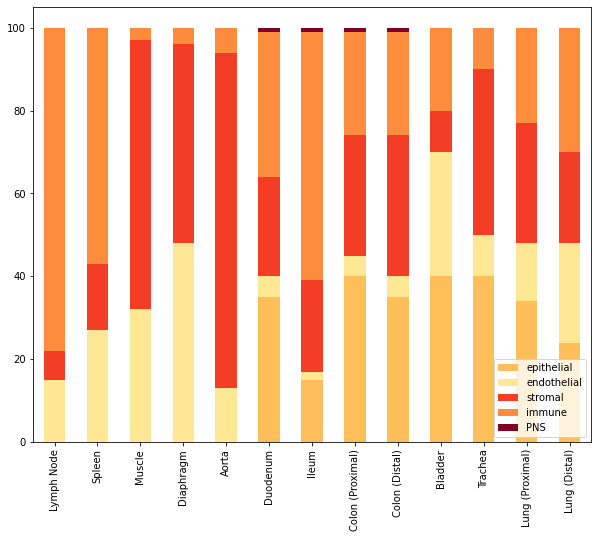

In [25]:
f = plt.figure(figsize=(10,8))
pathology.drop('Spatial Heterogeneity (AKA Error)',axis=1).plot(
#     order = pathology["Spatial Heterogeneity (AKA Error)"],
    kind='bar',stacked=True, 
    ax=f.gca(),color=compartments_color_dict, 
    legend=True
)

plt.savefig("figures/compartment_proportions_pathology_tsp1_2.pdf")

### TSP14

In [26]:
pathology_2 = pd.read_csv("Tabula_Sapiens_Tissue_Abundance_Ratios_TSP14.csv",index_col=0)
pathology_2

,Epithelial,Endothelial,Stromal,Immune,PNS
Tissue Type/Location,,,,,
Abdominal Muscle,0,60,30,0,0
Anterior Tongue,15,10,62,8,5
Ascending Colon,30,5,39,25,1
Bladder,50,5,34,10,1
Diaphragm,0,40,60,0,0
Duodenum,50,5,9,35,1
Heart,0,30,60,10,0
Ileum,20,5,43,30,2
Liver,75,5,5,15,0


In [27]:
pathology_2["tissue"] = ["Muscle","Tongue","Large Intestine","Bladder",
                         "Muscle","Small Intestine","Heart", "Small Intestine",
                         "Liver","Lung","Fat","Pancreas",
                         "Salivary Gland","Tongue","Colon","Spleen",
                         "Fat","Salivary Gland","Thymus","Trachea"]

In [28]:
# pathology_2 = pathology[["endothelial_cell_count","epithelial_cell_count","immune_cell_count","stromal_cell_count"]]

In [29]:
pathology_2.columns = ["epithelial","endothelial","stromal","immune","PNS","tissue"]

In [30]:
pathology_2

,epithelial,endothelial,stromal,immune,PNS,tissue
Tissue Type/Location,,,,,,
Abdominal Muscle,0,60,30,0,0,Muscle
Anterior Tongue,15,10,62,8,5,Tongue
Ascending Colon,30,5,39,25,1,Large Intestine
Bladder,50,5,34,10,1,Bladder
Diaphragm,0,40,60,0,0,Muscle
Duodenum,50,5,9,35,1,Small Intestine
Heart,0,30,60,10,0,Heart
Ileum,20,5,43,30,2,Small Intestine
Liver,75,5,5,15,0,Liver


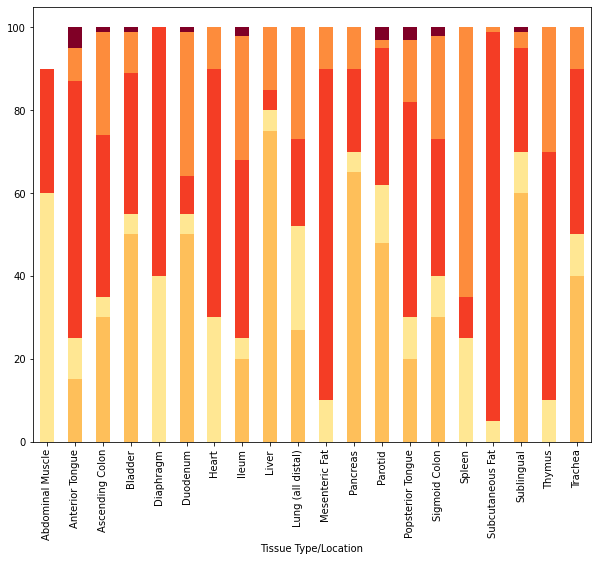

In [31]:
f = plt.figure(figsize=(10,8))
pathology_2.plot(
    kind='bar',stacked=True, ax=f.gca(),color=compartments_color_dict, legend=False
)

plt.savefig("figures/compartment_proportions_pathology_tsp14.pdf")

## Updated Table

### TSP1+TSP2

In [60]:
pathology = pd.read_excel("TabulaSapiensTissueAbundanceRatiosRevised.xlsx","TSP2",index_col=0)
pathology

,Epithelilal,Endothelial,Stromal,Immune,Neuroglia,Spatial Heterogeneity (AKA Error)
Lymph Node,0,15,7,78,0,1
Spleen,0,27,16,57,0,1
Muscle,0,32,65,3,0,1
Diaphragm,0,48,48,4,0,1
Aorta,0,13,81,6,0,1
Duodenum,35,5,24,35,1,2
Ileum,15,2,22,60,1,2
Colon (Proximal),40,5,29,25,1,2
Colon (Distal),35,5,34,25,1,2
Bladder,40,10,30,20,0,2


In [54]:
pathology.columns

Index(['Epithelilal', 'Endothelial', 'Stromal', 'Immune', 'Neuroglia',
       'Spatial Heterogeneity (AKA Error)'],
      dtype='object')

In [55]:
pathology_pancreas = pd.read_csv("serena_tsp1_tsp2_count_per_cell_type.csv",index_col=0)
pathology_pancreas = pathology_pancreas.iloc[-4:]
pathology_pancreas

,endothelial_cell_count,epithelial_cell_count,immune_cell_count,stromal_cell_count,endothelial_pixel_count,epithelial_pixel_count,immune_pixel_count,stromal_pixel_count
image_id,,,,,,,,
PN 20x 1_pilot1_pancreas_labels.png,10,2378,15,325,222,117701,809,14203
PN 20x 3_pilot1_pancreas_labels.png,46,1830,8,91,1117,83315,253,2473
PN 40x 5_pilot1_pancreas_labels.png,58,93,19,116,5085,11865,1600,10279
PN 40x 6_pilot1_pancreas_labels.png,29,61,0,306,2280,7373,0,35055


In [56]:
pathology_pancreas = pathology_pancreas[["epithelial_cell_count","endothelial_cell_count","stromal_cell_count","immune_cell_count"]]
pathology_pancreas.columns = ['Epithelilal', 'Endothelial', 'Stromal', 'Immune']
pathology_pancreas['Neuroglia'] = 0
pathology_pancreas['Spatial Heterogeneity (AKA Error)'] = 0
pathology_pancreas.loc["Pancreas"] = pathology_pancreas.sum(axis=0)
pathology_pancreas

<ipython-input-56-9f8f5e41b4dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pathology_pancreas['Neuroglia'] = 0
<ipython-input-56-9f8f5e41b4dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pathology_pancreas['Spatial Heterogeneity (AKA Error)'] = 0
/data/angela/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

,Epithelilal,Endothelial,Stromal,Immune,Neuroglia,Spatial Heterogeneity (AKA Error)
image_id,,,,,,
PN 20x 1_pilot1_pancreas_labels.png,2378,10,325,15,0,0
PN 20x 3_pilot1_pancreas_labels.png,1830,46,91,8,0,0
PN 40x 5_pilot1_pancreas_labels.png,93,58,116,19,0,0
PN 40x 6_pilot1_pancreas_labels.png,61,29,306,0,0,0
Pancreas,4362,143,838,42,0,0


In [57]:
pathology.loc["Pancreas"] = pathology_pancreas.loc["Pancreas"]

In [61]:
pathology = pathology.rename(
    {'Epithelilal':'epithelial','Neuroglia':'PNS',"Endothelial": "endothelial","Stromal":"stromal","Immune":"immune"},
    axis=1
)
pathology

,epithelial,endothelial,stromal,immune,PNS,Spatial Heterogeneity (AKA Error)
Lymph Node,0,15,7,78,0,1
Spleen,0,27,16,57,0,1
Muscle,0,32,65,3,0,1
Diaphragm,0,48,48,4,0,1
Aorta,0,13,81,6,0,1
Duodenum,35,5,24,35,1,2
Ileum,15,2,22,60,1,2
Colon (Proximal),40,5,29,25,1,2
Colon (Distal),35,5,34,25,1,2
Bladder,40,10,30,20,0,2


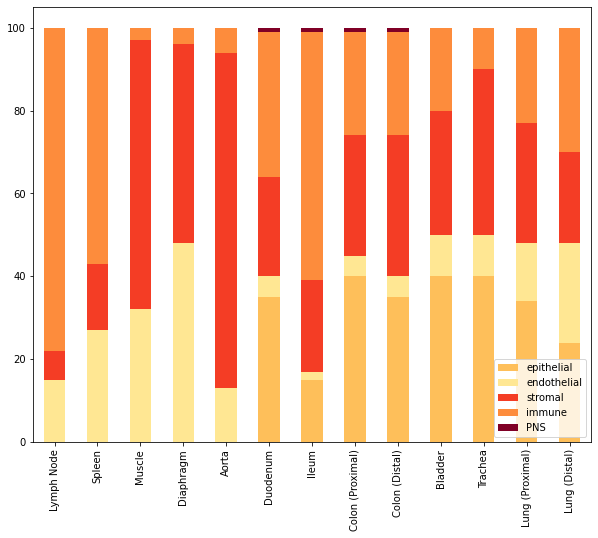

In [62]:
f = plt.figure(figsize=(10,8))
pathology.drop('Spatial Heterogeneity (AKA Error)',axis=1).plot(
#     order = pathology["Spatial Heterogeneity (AKA Error)"],
    kind='bar',stacked=True, 
    ax=f.gca(),color=compartments_color_dict, 
    legend=True
)

plt.savefig("figures/compartment_proportions_pathology_tsp1_2.pdf")

### TSP14

In [67]:
pathology_2 = pd.read_excel("TabulaSapiensTissueAbundanceRatiosRevised.xlsx","TSP14_AOP",index_col=0)
pathology_2

,Slides,Epithelilal,Endothelial,Stromal,Immune,Neuroglia,Spatial Heterogeneity (AKA Error)
Tissue Type/Location,,,,,,,
Diaphragm,"DI-A,B",0,38,57,5,0,1
Subcutaneous Fat,"FT-A,B,C,D",0,5,94,1,0,1
Mesenteric Fat,"FT-E,F,G",0,10,80,10,0,1
Heart,HT-A,0,30,60,10,0,1
Duodenum,IN-A,50,5,9,35,1,2
Ileum,IN-B,20,5,43,30,2,2
Ascending Colon,IN-C,30,5,39,25,1,2
Sigmoid Colon,IN-D,30,10,33,25,2,2
Lung (all distal),"LU-A,B,C",27,25,21,27,0,3


In [27]:
# pathology_2["tissue"] = ["Muscle","Tongue","Large Intestine","Bladder",
#                          "Muscle","Small Intestine","Heart", "Small Intestine",
#                          "Liver","Lung","Fat","Pancreas",
#                          "Salivary Gland","Tongue","Colon","Spleen",
#                          "Fat","Salivary Gland","Thymus","Trachea"]

In [69]:
pathology_2 = pathology_2.drop("Slides",axis=1)
pathology_2

,Epithelilal,Endothelial,Stromal,Immune,Neuroglia,Spatial Heterogeneity (AKA Error)
Tissue Type/Location,,,,,,
Diaphragm,0,38,57,5,0,1
Subcutaneous Fat,0,5,94,1,0,1
Mesenteric Fat,0,10,80,10,0,1
Heart,0,30,60,10,0,1
Duodenum,50,5,9,35,1,2
Ileum,20,5,43,30,2,2
Ascending Colon,30,5,39,25,1,2
Sigmoid Colon,30,10,33,25,2,2
Lung (all distal),27,25,21,27,0,3


In [28]:
# pathology_2 = pathology[["endothelial_cell_count","epithelial_cell_count","immune_cell_count","stromal_cell_count"]]

In [70]:
pathology_2.columns = ["epithelial","endothelial","stromal","immune","PNS","Spatial Heterogeneity (AKA Error)"]

In [73]:
pathology_2 = pathology_2.sort_values(by="Spatial Heterogeneity (AKA Error)")
pathology_2

,epithelial,endothelial,stromal,immune,PNS,Spatial Heterogeneity (AKA Error)
Tissue Type/Location,,,,,,
Diaphragm,0,38,57,5,0,1
Spleen,0,25,10,65,0,1
Thymus,0,10,60,30,0,1
Abdominal Muscle,0,57,38,5,0,1
Subcutaneous Fat,0,5,94,1,0,1
Heart,0,30,60,10,0,1
Mesenteric Fat,0,10,80,10,0,1
Duodenum,50,5,9,35,1,2
Popsterior Tongue,20,10,52,15,3,2


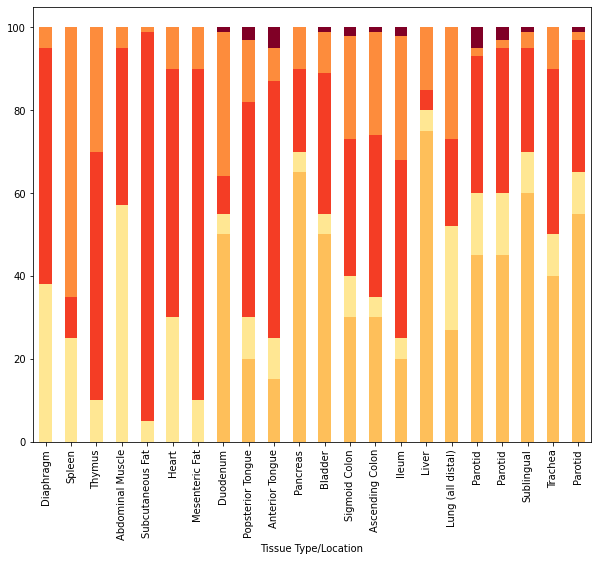

In [74]:
f = plt.figure(figsize=(10,8))
pathology_2.drop('Spatial Heterogeneity (AKA Error)',axis=1).plot(
    kind='bar',stacked=True, ax=f.gca(),color=compartments_color_dict, legend=False
)

plt.savefig("figures/compartment_proportions_pathology_tsp14.pdf")

## Compare

### updated Table Revision

In [47]:
pathology_seq = pd.read_csv("TSsequencing_pathology-nobalance.csv").drop("index",axis=1)
pathology_seq = pd.read_csv("TSsequencing_pathology-nobalance_xy.csv").dropna()
pathology_seq.head()

,tissue,donor,compartment,sequencing,pathology
13,Large_Intestine,TSP2,endothelial,1.222902,5.0
15,Large_Intestine,TSP2,epithelial,89.772096,37.5
17,Large_Intestine,TSP2,immune,3.835464,25.0
19,Large_Intestine,TSP2,stromal,5.169539,31.5
21,Lung,TSP1,endothelial,2.893916,19.0


In [48]:
pathology_seq.shape

(23, 5)

In [29]:
pathology_seq = pd.pivot_table(pathology_seq, 
               columns="source", 
               index=["tissue","donor","compartment"]
              ).reset_index().fillna(0)
pathology_seq.columns = ["tissue","donor","compartment","pathology","sequencing"]
pathology_seq.head()

,tissue,donor,compartment,pathology,sequencing
0,Large_Intestine,TSP2,endothelial,5.0,1.222902
1,Large_Intestine,TSP2,epithelial,37.5,89.772096
2,Large_Intestine,TSP2,immune,25.0,3.835464
3,Large_Intestine,TSP2,stromal,31.5,5.169539
4,Lung,TSP1,endothelial,0.0,2.893916


In [41]:
pathology_seq.shape

(23, 5)

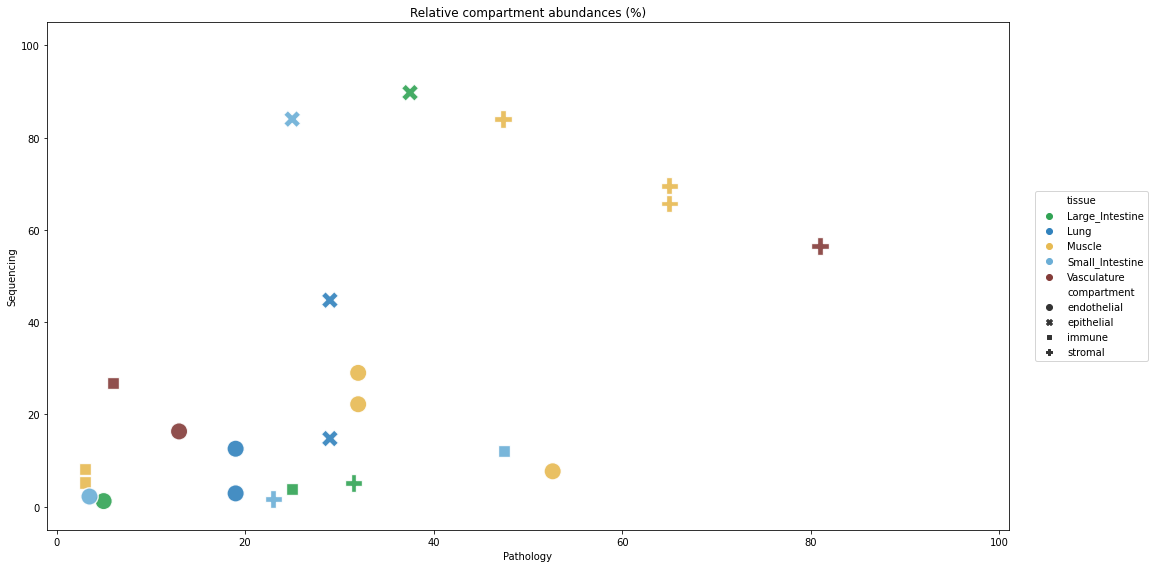

In [52]:
f = plt.figure(figsize=(16,8))
g = sns.scatterplot(data = pathology_seq,
               x = "pathology",
               y = "sequencing",
                hue='tissue',
                style='compartment',s=300,alpha=.9,
                palette=tissues_color_dict,
                   )
g.legend(loc='center right', bbox_to_anchor=(1.15, 0.5), ncol=1)
g.set(ylim=(-5,105),xlim=(-1,101))

# x0, x1 = g.get_xlim()
# y0, y1 = g.get_ylim()
# lims = [max(x0, y0), min(x1, y1)]
# g.plot(lims, lims, ':k')
plt.ylabel("Sequencing")
plt.xlabel("Pathology")
plt.title("Relative compartment abundances (%)")
# g.set_yscale("log")
# g.set_xscale("log")

plt.tight_layout()
plt.savefig("sequencing_pathology_comparison.pdf")


# sns.scatterplot(data = pathology_seq,
#                x = "pathology",
#                y = "sequencing",
#                 hue = "tissue",
#                palette=tissues_color_dict,
#                 style='compartment',s=300,alpha=.9,
#                )

### use SRQ table

In [33]:
pathology_seq = pd.read_csv("TSsequencing_pathology_SRQ.csv")
pathology_seq

,Pathology,Pathology_err,Sequencing,Sequencing_err
0,10.029248,3.359035,14.955303,9.054520
1,29.600000,2.862291,26.024720,16.757316
2,51.125000,2.310085,50.356232,23.559921
3,71.400557,4.382162,77.018400,9.304556


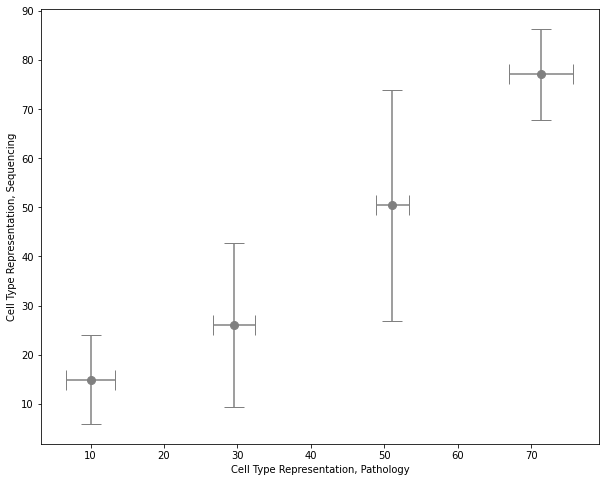

In [52]:
fig,ax = plt.subplots(figsize=(10,8))
# ax = fig.add_subplot( aspect=1)
ax.errorbar(
        pathology_seq["Pathology"], pathology_seq["Sequencing"],  
        yerr=pathology_seq["Sequencing_err"],
        xerr=pathology_seq["Pathology_err"],
    fmt='o', markersize=8, capsize=10, color = "grey"
)


ax.set_xlabel("Cell Type Representation, Pathology")
ax.set_ylabel("Cell Type Representation, Sequencing")

plt.savefig("figures/bin_proportions_pathology_sequencing.pdf")

### combine

In [32]:
df_long = df.copy()
df_long = df_long.reset_index()
df_long = df_long.groupby(['tissue','donor']).sum().reset_index()
df_long = df_long.melt(
    id_vars=['tissue','donor'], 
    value_vars=list(df_long.columns[2:]), # list of days of the week
    var_name='compartment', 
    value_name='count'
)
df_long['source'] = 'sequencing'
df_long

,tissue,donor,compartment,count,source
0,Bladder,TSP1,endothelial,1.760116,sequencing
1,Bladder,TSP2,endothelial,1.328477,sequencing
2,Blood,TSP1,endothelial,0.000000,sequencing
3,Blood,TSP10,endothelial,0.000000,sequencing
4,Blood,TSP14,endothelial,0.000000,sequencing
...,...,...,...,...,...
265,Trachea,TSP2,stromal,5.810968,sequencing
266,Trachea,TSP6,stromal,25.572118,sequencing
267,Uterus,TSP4,stromal,51.798772,sequencing
268,Vasculature,TSP14,stromal,64.810638,sequencing


In [30]:
df_long[df_long['tissue']=='Bladder']

,tissue,donor,compartment,count,source
0,Bladder,TSP1,endothelial,1.760116,sequencing
1,Bladder,TSP2,endothelial,1.328477,sequencing
54,Bladder,TSP1,epithelial,16.185810,sequencing
55,Bladder,TSP2,epithelial,9.235055,sequencing
108,Bladder,TSP1,germ line,0.000000,sequencing
109,Bladder,TSP2,germ line,0.000000,sequencing
162,Bladder,TSP1,immune,40.074397,sequencing
163,Bladder,TSP2,immune,59.031498,sequencing
216,Bladder,TSP1,stromal,41.979677,sequencing
217,Bladder,TSP2,stromal,30.404971,sequencing


In [31]:
pathology

,epithelial,endothelial,stromal,immune,PNS,Spatial Heterogeneity (AKA Error)
Lymph Node,0,15,7,78,0,1
Spleen,0,27,16,57,0,1
Muscle,0,32,65,3,0,1
Diaphragm,0,48,48,4,0,1
Aorta,0,13,81,6,0,1
Duodenum,35,5,24,35,1,2
Ileum,15,2,22,60,1,2
Colon (Proximal),40,5,29,25,1,2
Colon (Distal),35,5,34,25,1,2
Bladder,40,30,10,20,0,2


In [32]:
p2 = pathology.drop('Spatial Heterogeneity (AKA Error)',axis=1).reset_index()
# p2 = pathology.copy()
# 
p2['index'] = [p.split(' (')[0] for p in p2['index']]
p2 = p2.replace(
    {
        'Colon':'Large_Intestine',
        'Duodenum':'Small_Intestine','Ileum':'Small_Intestine',
        'Aorta' : 'Vasculature'
    }
)
p2 = p2.groupby('index').sum().reset_index()
p2['sum'] = p2.sum(axis=1)
p2.iloc[:,1:] = p2.iloc[:,1:].div(p2['sum'],axis=0)*100
p2 = p2.drop('sum',axis=1)
p2 = p2.melt(
    id_vars='index', 
    value_vars=list(p2.columns[1:]), # list of days of the week
    var_name='compartment', 
    value_name='count'
)
p2 = p2.rename({'index':'tissue'},axis=1)
p2['source'] = 'pathology'
p2['donor'] = 'tsp1+2'
p2

,tissue,compartment,count,source,donor
0,Bladder,epithelial,40.000000,pathology,tsp1+2
1,Diaphragm,epithelial,0.000000,pathology,tsp1+2
2,Large_Intestine,epithelial,37.500000,pathology,tsp1+2
3,Lung,epithelial,29.000000,pathology,tsp1+2
4,Lymph Node,epithelial,0.000000,pathology,tsp1+2
5,Muscle,epithelial,0.000000,pathology,tsp1+2
6,Pancreas,epithelial,81.002786,pathology,tsp1+2
7,Small_Intestine,epithelial,25.000000,pathology,tsp1+2
8,Spleen,epithelial,0.000000,pathology,tsp1+2
9,Trachea,epithelial,40.000000,pathology,tsp1+2


In [33]:
# ptsp14 = pathology.drop('Spatial Heterogeneity (AKA Error)',axis=1).reset_index()
ptsp14 = pathology_2.copy()
# 
# ptsp14['index'] = [p.split(' (')[0] for p in ptsp14['index']]
# ptsp14 = ptsp14.replace(
#     {
#         'Colon':'Large_Intestine',
#         'Duodenum':'Small_Intestine','Ileum':'Small_Intestine',
#         'Aorta' : 'Vasculature'
#     }
# )
ptsp14 = ptsp14.groupby('tissue').sum().reset_index()
ptsp14['sum'] = ptsp14.sum(axis=1)
ptsp14.iloc[:,1:] = ptsp14.iloc[:,1:].div(ptsp14['sum'],axis=0)*100
ptsp14 = ptsp14.drop('sum',axis=1)
ptsp14 = ptsp14.melt(
    id_vars='tissue', 
    value_vars=list(ptsp14.columns[1:]), # list of days of the week
    var_name='compartment', 
    value_name='count'
)
# ptsp14 = ptsp14.rename({'index':'tissue'},axis=1)
ptsp14['source'] = 'pathology'
ptsp14['donor'] = 'tsp14'
ptsp14

,tissue,compartment,count,source,donor
0,Bladder,epithelial,50.0,pathology,tsp14
1,Colon,epithelial,30.0,pathology,tsp14
2,Fat,epithelial,0.0,pathology,tsp14
3,Heart,epithelial,0.0,pathology,tsp14
4,Large Intestine,epithelial,30.0,pathology,tsp14
...,...,...,...,...,...
70,Small Intestine,PNS,1.5,pathology,tsp14
71,Spleen,PNS,0.0,pathology,tsp14
72,Thymus,PNS,0.0,pathology,tsp14
73,Tongue,PNS,4.0,pathology,tsp14


In [34]:
set(p2['tissue'])&set(df_long['tissue'])

{'Bladder',
 'Large_Intestine',
 'Lung',
 'Muscle',
 'Pancreas',
 'Small_Intestine',
 'Spleen',
 'Trachea',
 'Vasculature'}

In [35]:
set(ptsp14['tissue'])&set(df_long['tissue'])

{'Bladder',
 'Fat',
 'Heart',
 'Liver',
 'Lung',
 'Muscle',
 'Pancreas',
 'Spleen',
 'Thymus',
 'Tongue',
 'Trachea'}

In [36]:
seq_pat = pd.concat([df_long,p2,ptsp14],axis=0)
seq_pat['sample'] = seq_pat['tissue'] + "_" + seq_pat['source']
seq_pat = seq_pat[seq_pat['tissue'].isin(set(p2['tissue'])&set(df_long['tissue']))]
seq_pat

,tissue,donor,compartment,count,source,sample
0,Bladder,TSP1,endothelial,1.760116,sequencing,Bladder_sequencing
1,Bladder,TSP2,endothelial,1.328477,sequencing,Bladder_sequencing
18,Large_Intestine,TSP14,endothelial,0.271003,sequencing,Large_Intestine_sequencing
19,Large_Intestine,TSP2,endothelial,1.222902,sequencing,Large_Intestine_sequencing
22,Lung,TSP1,endothelial,2.893916,sequencing,Lung_sequencing
...,...,...,...,...,...,...
66,Lung,tsp14,PNS,0.000000,pathology,Lung_pathology
67,Muscle,tsp14,PNS,0.000000,pathology,Muscle_pathology
68,Pancreas,tsp14,PNS,0.000000,pathology,Pancreas_pathology
71,Spleen,tsp14,PNS,0.000000,pathology,Spleen_pathology


In [37]:
seq_pat.to_csv("sequencing_pathology.csv")

In [155]:
seq_pat[seq_pat['tissue']=='Spleen']

,tissue,donor,compartment,count,source,sample
42,Spleen,TSP14,endothelial,0.674963,sequencing,Spleen_sequencing
43,Spleen,TSP2,endothelial,2.329053,sequencing,Spleen_sequencing
44,Spleen,TSP7,endothelial,4.633516,sequencing,Spleen_sequencing
96,Spleen,TSP14,epithelial,0.000000,sequencing,Spleen_sequencing
97,Spleen,TSP2,epithelial,0.000000,sequencing,Spleen_sequencing
98,Spleen,TSP7,epithelial,0.000000,sequencing,Spleen_sequencing
150,Spleen,TSP14,germ line,0.000000,sequencing,Spleen_sequencing
151,Spleen,TSP2,germ line,0.000000,sequencing,Spleen_sequencing
152,Spleen,TSP7,germ line,0.000000,sequencing,Spleen_sequencing
204,Spleen,TSP14,immune,99.325037,sequencing,Spleen_sequencing


In [164]:
seq_pat_pivot = pd.pivot_table(seq_pat, values='count', index=['tissue','compartment','donor'],
                    columns=['source']).reset_index()

In [157]:
# seq_pat_pivot["pathology"] = np.log(seq_pat_pivot["pathology"])
# seq_pat_pivot["sequencing"] = np.log(seq_pat_pivot["sequencing"])

In [171]:
seq_pat_2 = seq_pat.groupby(["tissue","compartment","source"]).mean().reset_index()
seq_pat_2 = pd.pivot_table(seq_pat_2, values='count', index=['tissue','compartment'],
                    columns=['source']).reset_index()
seq_pat_2 = seq_pat_2.fillna(0)
seq_pat_2["sum"] = seq_pat_2["pathology"] + seq_pat_2["sequencing"]
seq_pat_2 = seq_pat_2[seq_pat_2["sum"]>0]
seq_pat_2

seq_pat_3 = seq_pat.groupby(["tissue","compartment","source"]).sem().reset_index()
seq_pat_3 = seq_pat_3.fillna(0)
seq_pat_3 = pd.pivot_table(seq_pat_3, values='count', index=['tissue','compartment'],
                    columns=['source']).reset_index()
seq_pat_3 = seq_pat_3.fillna(0)
seq_pat_3["pathology_err"] = seq_pat_3["pathology"]
seq_pat_3 = seq_pat_3.drop("pathology",axis=1)
seq_pat_3["sequencing_err"] = seq_pat_3["sequencing"]
seq_pat_3 = seq_pat_3.drop("sequencing",axis=1)
seq_pat_3.index = seq_pat_3["tissue"]+"_"+seq_pat_3["compartment"]
seq_pat_3 = seq_pat_3.drop("tissue",axis=1)
seq_pat_3 = seq_pat_3.drop("compartment",axis=1)
seq_pat_3

seq_pat_2.index = seq_pat_2["tissue"]+"_"+seq_pat_2["compartment"]
seq_pat_2 = seq_pat_2.join(seq_pat_3)

seq_pat_2["color"] = [tissues_color_dict[t] for t in seq_pat_2["tissue"]]
seq_pat_2


source,tissue,compartment,pathology,sequencing,sum,pathology_err,sequencing_err,color
Bladder_PNS,Bladder,PNS,0.500000,0.000000,0.500000,0.500000,0.000000,#e7969c
Bladder_endothelial,Bladder,endothelial,17.500000,1.544296,19.044296,12.500000,0.215820,#e7969c
Bladder_epithelial,Bladder,epithelial,45.000000,12.710432,57.710432,5.000000,3.475378,#e7969c
Bladder_immune,Bladder,immune,15.000000,49.552947,64.552947,5.000000,9.478551,#e7969c
Bladder_stromal,Bladder,stromal,22.000000,36.192324,58.192324,12.000000,5.787353,#e7969c
Large_Intestine_PNS,Large_Intestine,PNS,1.000000,0.000000,1.000000,0.000000,0.000000,#31a354
Large_Intestine_endothelial,Large_Intestine,endothelial,5.000000,0.746952,5.746952,0.000000,0.475949,#31a354
Large_Intestine_epithelial,Large_Intestine,epithelial,37.500000,63.143763,100.643763,0.000000,26.628333,#31a354
Large_Intestine_immune,Large_Intestine,immune,25.000000,29.800414,54.800414,0.000000,25.964950,#31a354
Large_Intestine_stromal,Large_Intestine,stromal,31.500000,6.308871,37.808871,0.000000,1.139332,#31a354


Text(0, 0.5, 'pathology')

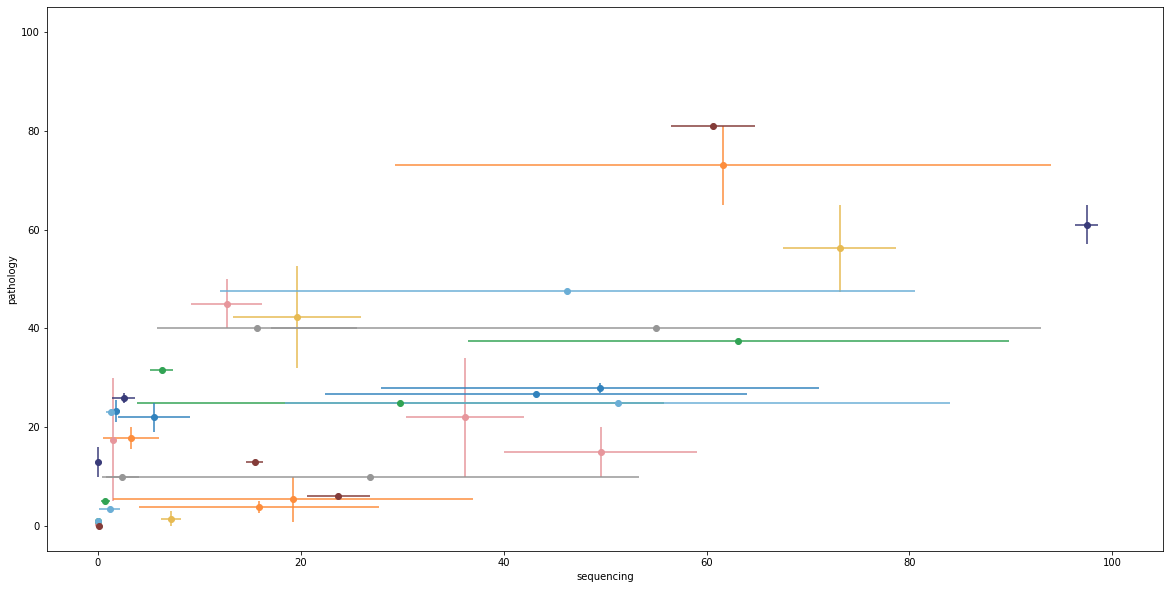

In [196]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.set(ylim=(-5,105),xlim=(-5,105))

# x0, x1 = ax.get_xlim()
# y0, y1 = ax.get_ylim()
# lims = [max(x0, y0), min(x1, y1)]
# ax.plot(lims, lims, ':k')


for i in seq_pat_2.index:
    ax.errorbar(
        seq_pat_2.loc[i,"sequencing"], seq_pat_2.loc[i,"pathology"],  
        yerr=seq_pat_2.loc[i,"pathology_err"],
        xerr=seq_pat_2.loc[i,"sequencing_err"],
        ecolor = seq_pat_2.loc[i,"color"],
        c = seq_pat_2.loc[i,"color"],
         fmt='o'
    #          marker='s', mfc='red',
    #          mec='green', ms=20, mew=4
    )


plt.xlabel("sequencing")
plt.ylabel("pathology")
# ax.set_xscale("log")
# ax.set_yscale("log")


In [165]:
seq_pat_pivot = seq_pat_pivot.fillna(0)
seq_pat_pivot["sum"] = seq_pat_pivot["pathology"] + seq_pat_pivot["sequencing"]
seq_pat_pivot = seq_pat_pivot[seq_pat_pivot["sum"]>0]
seq_pat_pivot

source,tissue,compartment,donor,pathology,sequencing,sum
1,Bladder,PNS,tsp14,1.0,0.000000,1.000000
2,Bladder,endothelial,TSP1,0.0,1.760116,1.760116
3,Bladder,endothelial,TSP2,0.0,1.328477,1.328477
4,Bladder,endothelial,tsp1+2,30.0,0.000000,30.000000
5,Bladder,endothelial,tsp14,5.0,0.000000,5.000000
...,...,...,...,...,...,...
175,Vasculature,immune,TSP2,0.0,26.791437,26.791437
176,Vasculature,immune,tsp1+2,6.0,0.000000,6.000000
177,Vasculature,stromal,TSP14,0.0,64.810638,64.810638
178,Vasculature,stromal,TSP2,0.0,56.544033,56.544033


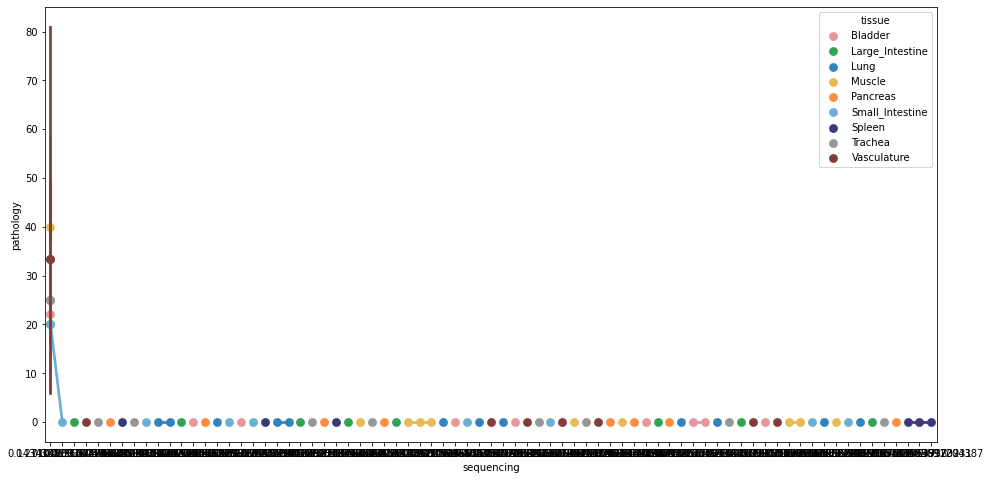

In [168]:
f = plt.figure(figsize=(16,8))
g = sns.pointplot(data = seq_pat_pivot,
                x='sequencing',
                y = 'pathology',
                hue='tissue',
#                 style='compartment',s=300,alpha=.9,
                palette=tissues_color_dict,
                   )
# g.legend(loc='center right', bbox_to_anchor=(1.15, 0.5), ncol=1)
# g.set(ylim=(-5,105),xlim=(-5,105))

# x0, x1 = g.get_xlim()
# y0, y1 = g.get_ylim()
# lims = [max(x0, y0), min(x1, y1)]
# g.plot(lims, lims, ':k')
# plt.xlabel("Sequencing")
# plt.ylabel("Pathology")
# plt.title("Relative compartment abundances (%)")
# # g.set_yscale("log")
# # g.set_xscale("log")

# plt.tight_layout()
# # plt.savefig("figures/compartment_proportions.pdf")

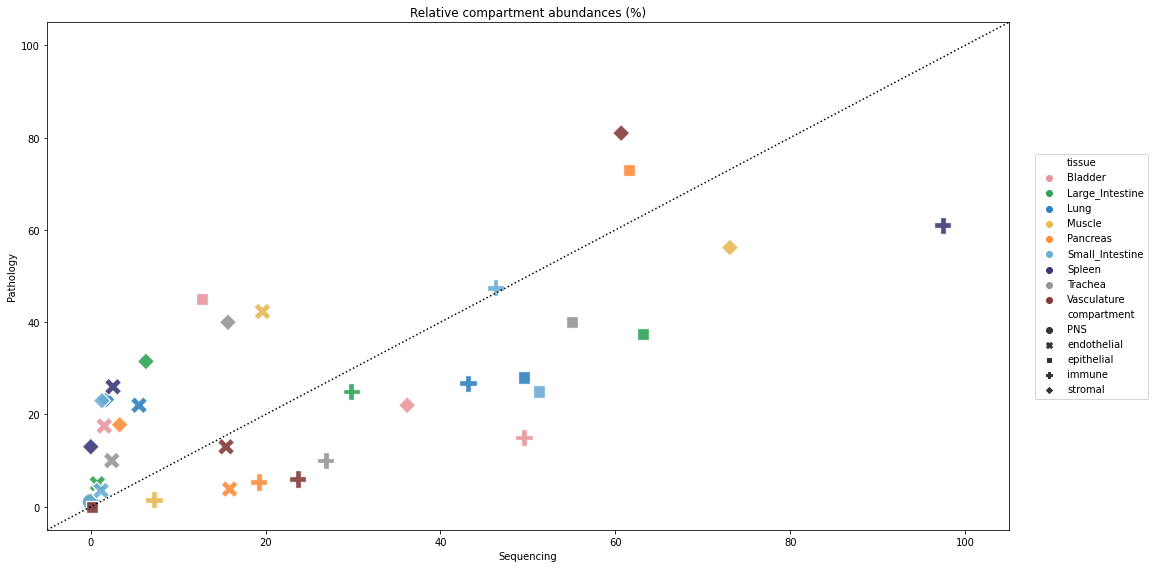

In [198]:
f = plt.figure(figsize=(16,8))
g = sns.scatterplot(data = seq_pat_2,
                x='sequencing',
                y = 'pathology',
                hue='tissue',
                style='compartment',s=300,alpha=.9,
                palette=tissues_color_dict,
                   )
g.legend(loc='center right', bbox_to_anchor=(1.15, 0.5), ncol=1)
g.set(ylim=(-5,105),xlim=(-5,105))

x0, x1 = g.get_xlim()
y0, y1 = g.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.plot(lims, lims, ':k')
plt.xlabel("Sequencing")
plt.ylabel("Pathology")
plt.title("Relative compartment abundances (%)")
# g.set_yscale("log")
# g.set_xscale("log")

plt.tight_layout()
# plt.savefig("figures/compartment_proportions.pdf")

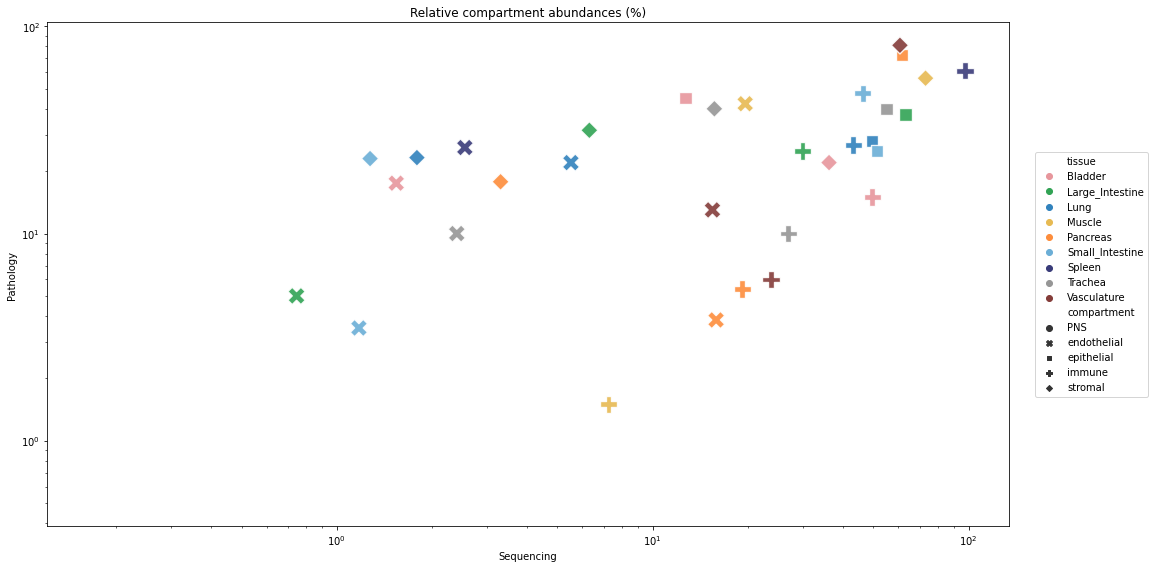

In [199]:
f = plt.figure(figsize=(16,8))
g = sns.scatterplot(data = seq_pat_2,
                x='sequencing',
                y = 'pathology',
                hue='tissue',
                style='compartment',s=300,alpha=.9,
                palette=tissues_color_dict,
                   )
g.legend(loc='center right', bbox_to_anchor=(1.15, 0.5), ncol=1)
# g.set(ylim=(-5,105),xlim=(-5,105))

# x0, x1 = g.get_xlim()
# y0, y1 = g.get_ylim()
# lims = [max(x0, y0), min(x1, y1)]
# g.plot(lims, lims, ':k')
plt.xlabel("Sequencing")
plt.ylabel("Pathology")
plt.title("Relative compartment abundances (%)")
g.set_yscale("log")
g.set_xscale("log")

plt.tight_layout()
# plt.savefig("figures/compartment_proportions.pdf")

## bining

Bining on abundance, split x axis into 4 blocks

In [213]:
seq_pat_2["bin"] = 0

for i in seq_pat_2.index:
    if seq_pat_2.loc[i,"sequencing"] < 25:
        seq_pat_2.loc[i,"bin"] = "low (<25%)"
    elif seq_pat_2.loc[i,"sequencing"] >= 25 and seq_pat_2.loc[i,"sequencing"] < 50:
        seq_pat_2.loc[i,"bin"] = "mid-low (25-50%)"
    elif seq_pat_2.loc[i,"sequencing"] >= 50 and seq_pat_2.loc[i,"sequencing"] < 75:
        seq_pat_2.loc[i,"bin"] = "mid-high (50-75%)"
    elif seq_pat_2.loc[i,"sequencing"] >= 75:
        seq_pat_2.loc[i,"bin"] = "high (>75%)"

seq_pat_2["bin_pat"] = 0

for i in seq_pat_2.index:
    if seq_pat_2.loc[i,"pathology"] < 25:
        seq_pat_2.loc[i,"bin_pat"] = 1
    elif seq_pat_2.loc[i,"pathology"] >= 25 and seq_pat_2.loc[i,"pathology"] < 50:
        seq_pat_2.loc[i,"bin_pat"] = 2
    elif seq_pat_2.loc[i,"pathology"] >= 50 and seq_pat_2.loc[i,"pathology"] < 75:
        seq_pat_2.loc[i,"bin_pat"] = 3
    elif seq_pat_2.loc[i,"pathology"] >= 75:
        seq_pat_2.loc[i,"bin_pat"] = 4
seq_pat_2

source,tissue,compartment,pathology,sequencing,sum,pathology_err,sequencing_err,color,bin,bin_pat
Bladder_PNS,Bladder,PNS,0.500000,0.000000,0.500000,0.500000,0.000000,#e7969c,low (<25%),1
Bladder_endothelial,Bladder,endothelial,17.500000,1.544296,19.044296,12.500000,0.215820,#e7969c,low (<25%),1
Bladder_epithelial,Bladder,epithelial,45.000000,12.710432,57.710432,5.000000,3.475378,#e7969c,low (<25%),2
Bladder_immune,Bladder,immune,15.000000,49.552947,64.552947,5.000000,9.478551,#e7969c,mid-low (25-50%),1
Bladder_stromal,Bladder,stromal,22.000000,36.192324,58.192324,12.000000,5.787353,#e7969c,mid-low (25-50%),1
Large_Intestine_PNS,Large_Intestine,PNS,1.000000,0.000000,1.000000,0.000000,0.000000,#31a354,low (<25%),1
Large_Intestine_endothelial,Large_Intestine,endothelial,5.000000,0.746952,5.746952,0.000000,0.475949,#31a354,low (<25%),1
Large_Intestine_epithelial,Large_Intestine,epithelial,37.500000,63.143763,100.643763,0.000000,26.628333,#31a354,mid-high (50-75%),2
Large_Intestine_immune,Large_Intestine,immune,25.000000,29.800414,54.800414,0.000000,25.964950,#31a354,mid-low (25-50%),2
Large_Intestine_stromal,Large_Intestine,stromal,31.500000,6.308871,37.808871,0.000000,1.139332,#31a354,low (<25%),2


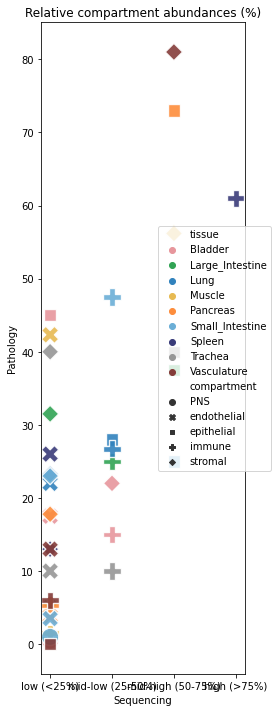

In [215]:
f = plt.figure(figsize=(4,10))
g = sns.scatterplot(data = seq_pat_2,
                x='bin',#"sequencing"
                y = 'pathology',#"bin_pat",#
                hue='tissue',
                style='compartment',s=300,alpha=.9,
                palette=tissues_color_dict,
                   )
g.legend(loc='center right', bbox_to_anchor=(1.15, 0.5), ncol=1)
# g.set(ylim=(-5,105),xlim=(-5,105))

# x0, x1 = g.get_xlim()
# y0, y1 = g.get_ylim()
# lims = [max(x0, y0), min(x1, y1)]
# g.plot(lims, lims, ':k')
plt.xlabel("Sequencing")
plt.ylabel("Pathology")
plt.title("Relative compartment abundances (%)")
# g.set_yscale("log")
# g.set_xscale("log")

plt.tight_layout()
plt.savefig("figures/compartment_proportions.pdf")

In [ ]:
def source_colors():
    methods = ['pathology', 'sequencing']
    
    import matplotlib.colors as pltcolors
    
    method_color_dict = {}
    method_color_dict['pathology'] = '#90ee90'
    method_color_dict['sequencing'] = '#006400'
    
    return method_color_dict
      
    return source_color_dict


source_color_dict = source_colors()

In [ ]:
help(sns.set_style)

In [ ]:
sns.set(font_scale=1) 
sns.set_style("white")
g = sns.FacetGrid(seq_pat, col="tissue", 
                  col_wrap=3, height=4, aspect=.5, 
                      
#     col_order=tissue_order,
                  
                 )#, ylim=(0, 10))
g.map_dataframe(sns.barplot, x = "compartment", y = "count",hue='source', palette=source_color_dict)#, ci=None);
g.set_axis_labels("Tissue", "Relative compartment abundancies")
g.add_legend()
g.set_xticklabels(rotation=90)

# for ( col_val), ax in g.axes_dict.items():
#         ax.set_facecolor((0, 0, 0, 0))
plt.tight_layout()

plt.savefig("figures/compartment_proportions.pdf")

In [ ]:
seq_pat

In [ ]:
g = sns.catplot(data = seq_pat,
           x = 'tissue',
           y = 'count',
           hue = 'compartment',
                 row = "source",
           kind = 'bar',
           palette=compartments_color_dict, height=3, size=8)
g.set_xticklabels(rotation=90)

In [ ]:
g = sns.catplot(data = seq_pat,
           x = 'sample',
           y = 'count',
           hue = 'compartment',
           kind = 'bar',
           palette=compartments_color_dict, height=10)
g.set_xticklabels(rotation=90)

## Check for anatomical position

In [ ]:
# df = pd.DataFrame(metadata.groupby(['donor','tissue','compartment','cell_ontology_type'])['cell_id'].count())
df_long_anat = metadata[metadata['method']=='10X'].copy()
df_long_anat = pd.DataFrame(df_long_anat.groupby(['tissue','anatomical_position','compartment'])['cell_id'].count())
df_long_anat = df_long_anat.reset_index()
df_long_anat = pd.pivot_table(
    data = df_long_anat,values='cell_id', 
    index=['tissue','anatomical_position'],
    columns=['compartment']
)
df_long_anat = df_long_anat.replace({np.nan:0})
df_long_anat['sum'] = df_long_anat.sum(axis=1)
df_long_anat.iloc[:, :] = df_long_anat.iloc[:, :].div(df_long_anat['sum'],axis=0)*100
df_long_anat = df_long_anat.drop('sum',axis=1)
df_long_anat

In [ ]:
df_long_anat = df_long_anat.reset_index()
df_long_anat = df_long_anat.replace({"nan":""})
df_long_anat['tissue_anat'] = df_long_anat['tissue'] + "_" + df_long_anat['anatomical_position']

df_long_anat_dic = {
'Bladder_':'Bladder',
 'Blood_':'Blood',
 'Bone_Marrow_vertebralbody':'Bone_Marrow',
 'Kidney_':'Kidney',
 'Large_Intestine_distal':'Colon (Distal)',
 'Large_Intestine_proximal':'Colon (Proximal)',
 'Lung_':'Lung',
 'Lung_proxmedialdistal':'Lung',
 'Lymph_Node_':'Lymph Node',
 'Muscle_':'Muscle',
 'Muscle_diaphragm':'Diaphragm',
 'Muscle_rectusabdominus':'Muscle',
 'Pancreas_Endocrine':'Pancreas',
 'Pancreas_Exocrine':'Pancreas',
 'Small_Intestine_distal':'Ileum',
 'Small_Intestine_proximal':'Duodenum',
 'Spleen_':'Spleen',
 'Thymus_':'Thymus',
 'Trachea_':'Trachea',
 'Vasculature_Aorta':'Aorta'
}

df_long_anat['tissue_anat'] = df_long_anat['tissue_anat'].map(df_long_anat_dic)

df_long_anat

In [ ]:
p3 = pathology.copy()
p3 = p3.reset_index()
p3 = p3.replace({'Lung (Proximal)':'Lung','Lung (Distal)':'Lung'})

p3 = p3.groupby('index').sum().reset_index()
p3['sum'] = p3.sum(axis=1)
p3.iloc[:,1:] = p3.iloc[:,1:].div(p3['sum'],axis=0)*100
p3 = p3.drop('sum',axis=1)
# p3 = p3.melt(
#     id_varsa='index', 
#     value_vars=list(p3.columns[1:]), # list of days of the week
#     var_name='compartment', 
#     value_name='count'
# )
# p3 = p3.rename({'index':'tissue'},axis=1)
p3

# Updating 

In [ ]:
tiss_cell_fractions(adata[adata.obs['donor']=='TSP2'].copy(),
                        technology_col='method',
                        groupby='tissue',
                        category='cell_ontology_type',
                        dataset="Pilot2")

In [ ]:
tiss_cell_fractions(adata[adata.obs['donor']=='TSP1'].copy(),
                        technology_col='method',
                        groupby='tissue',
                        category='cell_ontology_type',
                        dataset="Pilot1")

In [ ]:
adata.obs.head()#.columns

In [ ]:
tiss_cell_fractions(adata,
                    technology_col='donor',
                    breakby='tissue',
                    category='Propagated Annotation',
                    dataset="Tabula Sapiens",groupby='method')

In [ ]:
adata.obs.groupby(['tissue', 'propagated_cell_ontology_class', 'manual_cell_ontology_class'])

In [ ]:
technology_col='method'
breakby='tissue'
category='propagated_cell_ontology_class'
dataset="Tabula Sapiens"
groupby='donor'

for m in set(adata.obs[technology_col]):
    adata_subset = adata[adata.obs[technology_col] == m].copy()
    adata_subset = remove_cats(adata_subset)
    for t in list(set(adata_subset.obs[breakby]))[3:4]:
        print(t)
        tiss = adata_subset[adata_subset.obs[breakby] == t].copy()
        tiss = remove_cats(tiss)

        aux = tiss.obs.groupby([category,groupby])['cell_id'].count()
        aux = pd.DataFrame(aux).reset_index()
        aux['fraction'] = aux['cell_id']/aux['cell_id'].sum()
        aux['cell_number'] = aux['cell_id']


In [ ]:
aux